In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from matplotlib import pyplot
import seaborn as sns
import re
import math
import statsmodels
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import spearmanr

C:\Users\jiangy5\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# read files and basic functions

In [2]:
file_read_path = r'C:\Users\jiangy5\Box\Python code\Macrophages_reanalysis\data'
file_save_path = r'C:\Users\jiangy5\Box\SMAD PROJECT\Macrophage_reanalysis\multiome\files'

In [3]:
def filter_row_missings(df, number):
    '''Filter protein features and keep proteins with less than "number" missing values, protein features as index.'''
    # Using isna() to count missing values and keep rows with missing values less than "number"
    df_filtered = df[df.isna().sum(axis=1) <= number]
    return df_filtered

def knn_imputer(df, neighbors = 6):
    '''apply KNN imputation to a dataset'''
    from sklearn.impute import KNNImputer

    # Initialize the KNNImputer
    imputer = KNNImputer(n_neighbors = neighbors)
    
    imputed_df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns, index=df.index)
    return imputed_df
    
def calculate_mean(df):
    # Calculate mean values for each group of columns
    mean_T1 = df.iloc[:, 0:6].mean(axis=1)
    mean_T2 = df.iloc[:, 6:12].mean(axis=1)
    mean_T3 = df.iloc[:, 12:18].mean(axis=1)
    mean_T4 = df.iloc[:, 18:24].mean(axis=1)
    # Create a new DataFrame with the calculated means
    new_df = pd.DataFrame({
        'T1': mean_T1,
        'T2': mean_T2,
        'T3': mean_T3,
        'T4': mean_T4
    })
    return new_df

In [4]:
# standard scaler
from sklearn.preprocessing import StandardScaler

def standardscaler(df):    
    # # Initialize the StandardScaler
    scaler = StandardScaler()
    # Fit and transform the data according to rows
    scaled_data = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled_data, index=df.index, columns=df.columns)
    return scaled_df

# LC matrix input, peptides and proteins

In [5]:
df_lc = pd.read_csv(f'{file_read_path}/report_pg_matrix_macro_LC.tsv', sep='\t')  # read protein matrix of LC
pep_lc = pd.read_csv(f'{file_read_path}/report_pr_matrix_LC.tsv', sep='\t')       # read peptide matrix of LC

In [6]:
columns = np.r_[7, 10:34]   # select peptide sequence and quantities columns out 
pep_lc2 = pep_lc.iloc[:,columns]

In [7]:
pep_lc2.set_index('Modified.Sequence', inplace = True)  # set index for peptide matrix
df_lc.set_index('Protein.Names',inplace = True)         # set index for protein matrix

In [8]:
lc_re = df_lc.iloc[:,3:]          # select peptide sequence and quantities columns out 

In [9]:
#  filter the smad protein and peptide matrix by missing values no more than 1/4 
lc_re_filter  = filter_row_missings(lc_re.replace(0,np.nan), 8)
pep_lc_filter = filter_row_missings(pep_lc2.replace(0,np.nan), 1)

# missing value imputation to the LC protein matrix 
lc_re_filter2  = knn_imputer(lc_re_filter, neighbors = 4)
pep_lc_filter2 = knn_imputer(pep_lc_filter, neighbors = 4)

In [10]:
#  take log2 to the peptide and protein matrix of LC 
pep_lc_filter3 = np.log2(pep_lc_filter2)
lc_re_filter3  = np.log2(lc_re_filter2)

# SMAD matrix input, peptides and proteins

In [11]:
#  read smad protein and peptide quantity matrix
df_smad = pd.read_csv(f'{file_read_path}\commonProteins.csv',index_col=0)   # read protein matrix of smad
pep_smad = pd.read_csv(f'{file_read_path}\commonPeptides.csv',index_col=0)  # read peptide matrix of smad

In [12]:
df_smad

,1/sp|A6PWD2|FHAD1_MOUSE,1/sp|B2RXS4|PLXB2_MOUSE,1/sp|E9Q634|MYO1E_MOUSE,1/sp|O08529|CAN2_MOUSE,1/sp|O08553|DPYL2_MOUSE,1/sp|O08749|DLDH_MOUSE,1/sp|O08795|GLU2B_MOUSE,1/sp|O08807|PRDX4_MOUSE,1/sp|O08997|ATOX1_MOUSE,1/sp|O09005|DEGS1_MOUSE,...,8/sp|Q921F2|TADBP_MOUSE/tr|A0A087WR97|A0A087WR97_MOUSE/tr|A0A087WRZ5|A0A087WRZ5_MOUSE/tr|A0A087WSE4|A0A087WSE4_MOUSE/tr|Q6VYI4|Q6VYI4_MOUSE/tr|Q6VYI5|Q6VYI5_MOUSE/tr|Q8BLD4|Q8BLD4_MOUSE/tr|Q8R0B4|Q8R0B4_MOUSE,9/sp|G5E829|AT2B1_MOUSE/sp|Q9R0K7|AT2B2_MOUSE/tr|A0A1W2P867|A0A1W2P867_MOUSE/tr|A2ALL9|A2ALL9_MOUSE/tr|F8WHB1|F8WHB1_MOUSE/tr|Q0VF55|Q0VF55_MOUSE/tr|Q3UHH0|Q3UHH0_MOUSE/tr|Q8C048|Q8C048_MOUSE/tr|S4R1C4|S4R1C4_MOUSE,9/sp|P10853|H2B1F_MOUSE/sp|P10854|H2B1M_MOUSE/sp|Q64475|H2B1B_MOUSE/sp|Q64478|H2B1H_MOUSE/sp|Q64525|H2B2B_MOUSE/sp|Q6ZWY9|H2B1C_MOUSE/sp|Q8CGP1|H2B1K_MOUSE/sp|Q8CGP2|H2B1P_MOUSE/tr|Q8CBB6|Q8CBB6_MOUSE,9/sp|P15379|CD44_MOUSE/tr|A2APM1|A2APM1_MOUSE/tr|A2APM2|A2APM2_MOUSE/tr|A2APM3|A2APM3_MOUSE/tr|A2APM4|A2APM4_MOUSE/tr|A2APM5|A2APM5_MOUSE/tr|E9QKM8|E9QKM8_MOUSE/tr|Q3U8S1|Q3U8S1_MOUSE/tr|Q80X37|Q80X37_MOUSE,9/sp|P42208|SEPT2_MOUSE/tr|D3YV76|D3YV76_MOUSE/tr|D3YYB1|D3YYB1_MOUSE/tr|D3YZU7|D3YZU7_MOUSE/tr|D3Z1S1|D3Z1S1_MOUSE/tr|D3Z3C0|D3Z3C0_MOUSE/tr|E9Q3V6|E9Q3V6_MOUSE/tr|F6UKN5|F6UKN5_MOUSE/tr|F6WYM0|F6WYM0_MOUSE,9/sp|P61957|SUMO2_MOUSE/sp|Q9Z172|SUMO3_MOUSE/tr|D3Z794|D3Z794_MOUSE/tr|G3UWI9|G3UWI9_MOUSE/tr|G3UWX9|G3UWX9_MOUSE/tr|G3UZ60|G3UZ60_MOUSE/tr|G3UZA7|G3UZA7_MOUSE/tr|G3UZX6|G3UZX6_MOUSE/tr|H7BWX9|H7BWX9_MOUSE,9/sp|P98078|DAB2_MOUSE/tr|A0A0R4J104|A0A0R4J104_MOUSE/tr|E0CXT5|E0CXT5_MOUSE/tr|E0CYJ2|E0CYJ2_MOUSE/tr|E0CZ53|E0CZ53_MOUSE/tr|E9PX84|E9PX84_MOUSE/tr|E9QL31|E9QL31_MOUSE/tr|Q3TRE6|Q3TRE6_MOUSE/tr|Q9DCE6|Q9DCE6_MOUSE,9/sp|Q3TX08|TRM1_MOUSE/tr|A0A0R4IZW7|A0A0R4IZW7_MOUSE/tr|D3Z413|D3Z413_MOUSE/tr|E9PWD4|E9PWD4_MOUSE/tr|H3BK68|H3BK68_MOUSE/tr|H3BKB8|H3BKB8_MOUSE/tr|H3BKS8|H3BKS8_MOUSE/tr|H3BKV3|H3BKV3_MOUSE/tr|H3BL70|H3BL70_MOUSE,9/sp|Q60875|ARHG2_MOUSE/tr|H3BJ40|H3BJ40_MOUSE/tr|H3BJ45|H3BJ45_MOUSE/tr|H3BJ59|H3BJ59_MOUSE/tr|H3BJU7|H3BJU7_MOUSE/tr|H3BJX8|H3BJX8_MOUSE/tr|H3BKH9|H3BKH9_MOUSE/tr|H3BL15|H3BL15_MOUSE/tr|H3BLF9|H3BLF9_MOUSE,9/sp|Q9Z2W0|DNPEP_MOUSE/tr|A0A087WNX3|A0A087WNX3_MOUSE/tr|A0A087WRC1|A0A087WRC1_MOUSE/tr|A0A087WS31|A0A087WS31_MOUSE/tr|A0A087WSD3|A0A087WSD3_MOUSE/tr|A0A087WSE6|A0A087WSE6_MOUSE/tr|A0A087WSU0|A0A087WSU0_MOUSE/tr|Q3TVK3|Q3TVK3_MOUSE/tr|Q8BPW9|Q8BPW9_MOUSE
zoDIAq-file_DUAL_macro_1_corrected_fullOutput,0.0,13416.556858,0.000000,53455.308930,143647.838442,27674.070773,0.000000,8.202177e+05,36350.823552,0.000000,...,0.000000,0.000000,2.077796e+06,0.000000,0.000000,23756.325073,0.000000,0.0,0.000000,0.000000
zoDIAq-file_DUAL_macro_2_corrected_fullOutput,0.0,14128.708844,0.000000,52878.868783,139548.607809,35665.231318,0.000000,0.000000e+00,37405.544293,6255.251953,...,0.000000,0.000000,1.886856e+06,0.000000,0.000000,22412.148804,0.000000,0.0,0.000000,0.000000
zoDIAq-file_DUAL_macro_3_corrected_fullOutput,0.0,18373.710338,0.000000,61780.868785,149690.252333,29179.475468,63062.854146,8.525694e+05,26235.075954,4284.872864,...,6027.182404,0.000000,2.192747e+06,16037.080567,0.000000,24710.630615,0.000000,0.0,0.000000,0.000000
zoDIAq-file_DUAL_macro_4_corrected_fullOutput,0.0,21996.026848,14753.991933,54818.213548,142600.796371,32140.836874,55883.895264,8.594760e+05,39113.147361,0.000000,...,0.000000,0.000000,1.912297e+06,15661.577271,0.000000,21511.128906,0.000000,0.0,0.000000,0.000000
zoDIAq-file_DUAL_macro_5_corrected_fullOutput,0.0,19115.360485,14134.336708,74314.592826,180704.383534,30701.456564,64769.388583,1.164252e+06,52963.511253,5391.330688,...,5550.089081,26822.805420,2.417873e+06,17926.070923,0.000000,26185.020752,0.000000,0.0,0.000000,0.000000
zoDIAq-file_DUAL_macro_6_corrected_fullOutput,0.0,15459.065665,13187.217741,61876.599238,158062.616825,26701.980896,63042.455830,1.013239e+06,40662.600881,4797.785583,...,7494.347046,0.000000,2.046724e+06,16230.638367,0.000000,25480.234741,0.000000,0.0,0.000000,6274.129761
zoDIAq-file_DUAL_macro_7_c

In [13]:
# Transpose the protein and peptide matrix from smad
df_smad2  = df_smad.T
pep_smad2 = pep_smad.T

In [14]:
#  filter the smad protein and peptide matrix by missing values no more than 1/4 
smad_re_filter  = filter_row_missings(df_smad2.replace(0,np.nan), 8)
pep_smad_filter = filter_row_missings(pep_smad2.replace(0,np.nan), 1)

# missing value imputation to the smad protein matrix 
smad_re_filter2  = knn_imputer(smad_re_filter, neighbors = 4)
pep_smad_filter2 = knn_imputer(pep_smad_filter, neighbors = 4)

In [15]:
#  take log2 to the peptide and protein matrix of smad
smad_re_filter3   = np.log2(smad_re_filter2)
pep_smad_filter3  = np.log2(pep_smad_filter2)

In [16]:
def split_index_and_expand_rows(df):
    '''>>> input is a dataframe, try to split multiple proteins in the 
    index to separate rows but with same values <<<'''
    
    # Step 1: Reset the index to turn it into a column
    df = df.reset_index().rename(columns={'index': 'original_index'})
    # Step 2: Split the 'original_index' column by '/'
    df['split_index'] = df['original_index'].str.split('/')
    # Step 3: Remove the first element if it's an integer
    df['split_index'] = df['split_index'].apply(lambda x: x[1:] if x[0].isdigit() else x)
    # Step 4: Explode the 'split_index' column to create separate rows
    df_exploded = df.explode('split_index').reset_index(drop=True)
    # Step 5: Set 'split_index' as the new index and drop 'original_index'
    df_final = df_exploded.set_index('split_index')    
    return df_final 

In [17]:
# split multiple proteins in the index to separate rows
# smad_re_filter4 = split_index_and_expand_rows(smad_re_filter3).drop(columns=['original_index'])

In [18]:
smad_re_filter4 = smad_re_filter3.copy()

In [19]:
smad_re_filter4.index = [item.split('|')[-1] for item in smad_re_filter3.index]
smad_re_filter5 = smad_re_filter4[~smad_re_filter4.index.duplicated(keep='first')]   

# find shared proteins and peptides between LC and smad methods 

In [20]:
shared_proteins = [item for item in smad_re_filter5.index if item in lc_re_filter3.index]
shared_peptides = [item for item in pep_smad_filter3.index if item in pep_lc_filter3.index]

In [21]:
#  take the shared proteins out from both smad and LC matrix
lc_re_filter6    = lc_re_filter3.loc[lc_re_filter3.index.isin(shared_proteins)]
smad_re_filter6 = smad_re_filter5.loc[smad_re_filter5.index.isin(shared_proteins)]

In [22]:
#  take the shared peptides out from both smad and LC matrix
pep_smad_filter4 = pep_smad_filter3.loc[pep_smad_filter3.index.isin(shared_peptides)]
pep_lc_filter4    = pep_lc_filter3.loc[pep_lc_filter3.index.isin(shared_peptides)]

In [23]:
pep_smad_filter5 = pep_smad_filter4[~pep_smad_filter4.index.duplicated(keep='first')]   
pep_lc_filter5    = pep_lc_filter4[~pep_lc_filter4.index.duplicated(keep='first')]  

In [24]:
# apply standard-scaler to the protein matrix of LC and smad by column

lc_re_filter7    = standardscaler(lc_re_filter6)
smad_re_filter7 = standardscaler(smad_re_filter6)

In [25]:
lc_re_filter_mean_raw    = calculate_mean(lc_re_filter6).sort_index()
smad_re_filter_mean_raw = calculate_mean(smad_re_filter6).sort_index()

In [26]:
# calculate mean for the shared protein matrix from both LC and smad
lc_re_filter_mean    = calculate_mean(lc_re_filter7)
smad_re_filter_mean = calculate_mean(smad_re_filter7)

# calculate mean for the shared peptide matrix from both LC and smad
pep_lc_filter_mean    = calculate_mean(pep_lc_filter5)
pep_smad_filter_mean = calculate_mean(pep_smad_filter5)

In [27]:
# sort the index to the mean matrix from LC and smad
smad_fi = smad_re_filter_mean.sort_index()
lc_fi    = lc_re_filter_mean.sort_index()
# peptides 
pep_smad_fi = pep_smad_filter_mean.sort_index()
pep_lc_fi    = pep_lc_filter_mean.sort_index()

In [28]:
# apply standard-scaler to the protein matrix of LC and smad by rows
smad_fi2 = standardscaler(smad_fi.T).T
lc_fi2    = standardscaler(lc_fi.T).T

In [29]:
column_names       =  ['Con','LPS','IL-4','IRA']
column_names_smad = ['Con-smad','LPS-smad','IL-4-smad','IRA-smad']
column_names_lc    = ['Con-lc','LPS-lc','IL-4-lc','IRA-lc']
smad_fi2.columns  = column_names_smad
lc_fi2.columns     = column_names_lc

In [30]:
# concat dataframe of shared proteins from smad and LC
toge_lc_smad = pd.concat([smad_fi2, lc_fi2], axis=1)

In [31]:
toge_lc_smad.index = [item.split('_')[0] for item in toge_lc_smad.index]

In [32]:
figure_save_path = r'C:\Users\jiangy5\Box\Python code\Macrophages_reanalysis\figures'

# plot clustered heatmap for the correlation of protein matrix

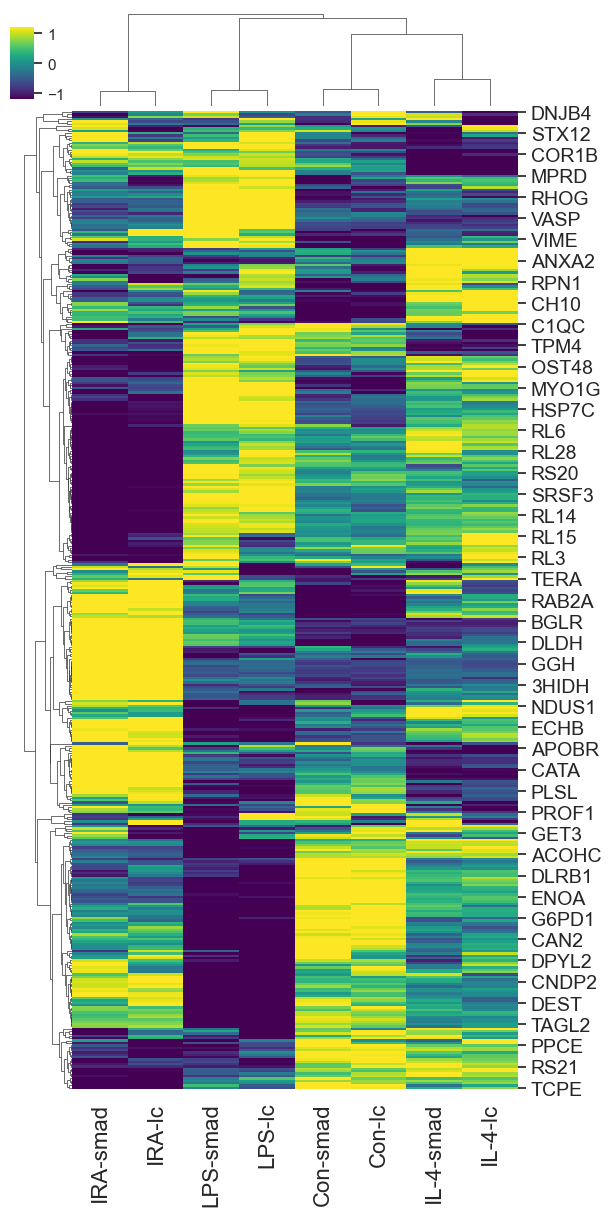

In [48]:
# plot hearmap to show the similarity:
# >>>  plot the combined dataframe of shared proteins from smad and LC 

sns.set(style="white")
plt.rcParams['font.family'] = 'Arial'
# plot cluster hearmap
g = sns.clustermap(toge_lc_smad, vmin=-1.2, vmax=1.2,
                   method='average',     # 聚类方法：'single', 'complete', 'average', 'ward'
                   metric='correlation',   # 距离度量：'euclidean', 'correlation', etc.
                   cmap='viridis',       # 颜色映射
                   # standard_scale=0,     # 对行（0）或列（1）进行标准化
                   figsize=(6, 12),     # 图像大小
                   dendrogram_ratio=(.1, .09),  # 树状图与热图的比例
                   cbar_pos=(0.01, 0.91, 0.04, 0.06)  # 色条位置
                  )

g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), fontsize=16, fontfamily='Arial')
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), fontsize=14, fontfamily='Arial')

plt.savefig(f'{figure_save_path}/heatmap_LC_smad_compare_and_clustered.svg',bbox_inches='tight')
plt.show()

# plot pearson R for every two columns in together matrix of LC and smad

In [49]:
toge_lc_smad

,Con-smad,LPS-smad,IL-4-smad,IRA-smad,Con-lc,LPS-lc,IL-4-lc,IRA-lc
1433E,1.195918,-1.487147,0.542959,-0.251730,1.215636,-1.241995,0.712940,-0.686581
1433F,1.387250,-1.437457,0.088322,-0.038115,1.090170,-1.335079,-0.584335,0.829244
1433G,1.078562,-1.634777,0.209110,0.347105,1.184539,-1.435303,-0.377278,0.628042
1433T,1.285652,-1.496372,0.312446,-0.101726,1.332241,-1.110675,0.584554,-0.806120
1433Z,1.486545,-1.332093,-0.120726,-0.033725,1.321527,-1.445860,-0.216513,0.340846
...,...,...,...,...,...,...,...,...
VDAC1,-1.568421,0.183263,0.169540,1.215618,-1.162822,0.198426,-0.553041,1.517437
VIME,-1.489209,0.764870,-0.321533,1.045872,-1.579328,1.176584,0.059469,0.343275
VMA5A,0.714759,-1.583123,0.984551,-0.116188,0.720051,-1.605802,0.948173,-0.062422
VPS35,0.225787,1.392993,-1.400307,-0.218473,0.419019,-1.537415,-0.087090,1.205485


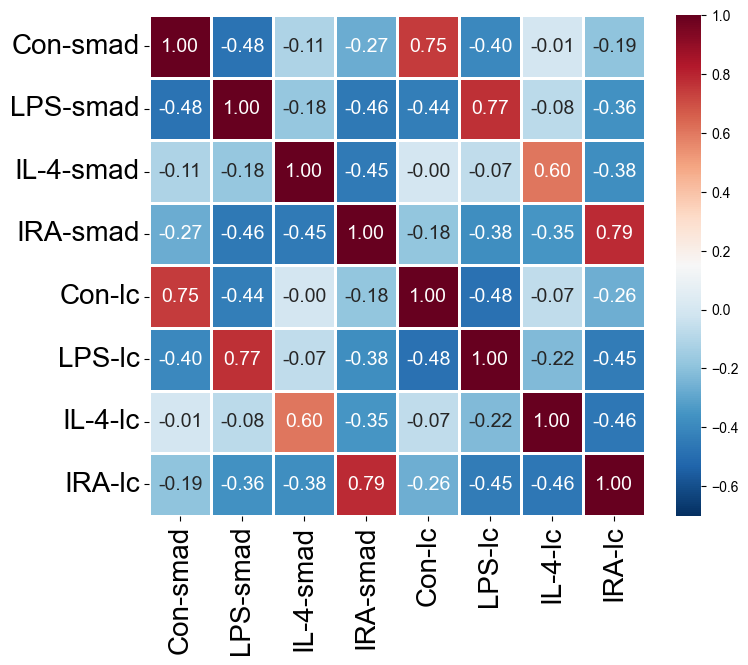

In [47]:
# plot pearson R for every two columns in together matrix of LC and smad

pearson_corr_toge = toge_lc_smad.corr(method='pearson')

plt.figure(figsize=(8, 6.5))
plt.rcParams['font.family'] = 'Arial'
sns.heatmap(pearson_corr_toge, annot=True, fmt=".2f",              
            annot_kws={"size": 14},cmap='RdBu_r', 
            vmin=-0.7, vmax=1, linewidths=.8)

# plt.title('Pearson Correlation Between Columns', fontsize=16)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)

# 显示图形
plt.savefig(f'{figure_save_path}/heatmap_LC_smad_pearson_R_correlation.svg',bbox_inches='tight')
plt.show()

# plot PCA to show the protein pattern of two matrix

In [34]:
treatment_lc = ['Con-lc']*6 + ['LPS-lc']*6 + ['IL_4-lc']*6 + ['IRD-lc']*6
treatment_smad = ['Con-smad']*6 + ['LPS-smad']*6 + ['IL_4-smad']*6 + ['IRD-smad']*6
lc_re_filter8 = lc_re_filter7.copy() 
smad_re_filter8 = smad_re_filter7.copy() 
lc_re_filter8.columns    =  treatment_lc
smad_re_filter8.columns =  treatment_smad 

In [35]:
test_pca = pd.concat([smad_re_filter8.sort_index(),lc_re_filter8.sort_index()], axis = 1)
# test_pca 

In [36]:
ha = standardscaler(test_pca.T)

In [37]:
from sklearn.decomposition import PCA

<Axes: xlabel='PC1', ylabel='PC2'>

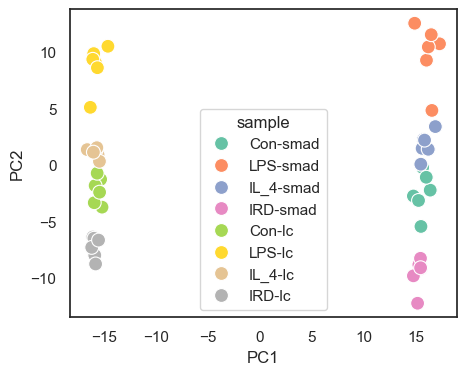

In [38]:
pca = PCA(n_components=2)  # 选择前两个主成分
pca_result = pca.fit_transform(ha)

# 3. 将 PCA 结果转换为 DataFrame 方便后续绘图
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['sample'] = ha.T.columns  # 添加样本名称

# 4. 可视化 PCA 结果
plt.figure(figsize=(5, 4))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue='sample', palette='Set2', s=100)

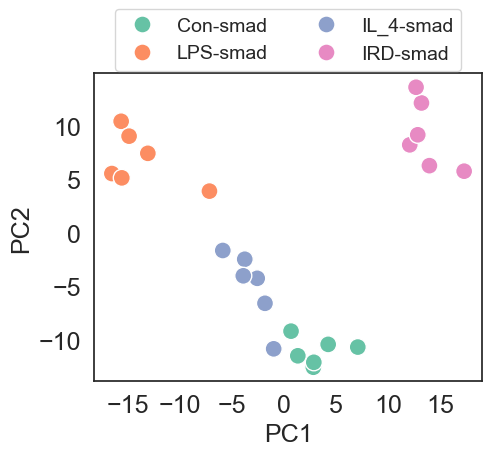

In [80]:
# 2. 应用 PCA 分析
pca = PCA(n_components=2)  
pca_result = pca.fit_transform(standardscaler(smad_re_filter8.T))

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['sample'] = standardscaler(smad_re_filter8.T).T.columns  # 添加样本名称

plt.figure(figsize=(5, 4))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue='sample', palette='Set2', s=150)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.24), ncol=2, fontsize = 14)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('PC1', fontsize=18)
plt.ylabel('PC2', fontsize=18)
plt.savefig(f'{figure_save_path}/scatter_plot_PCA_smad_shared_proteins.svg',bbox_inches='tight')
plt.show()

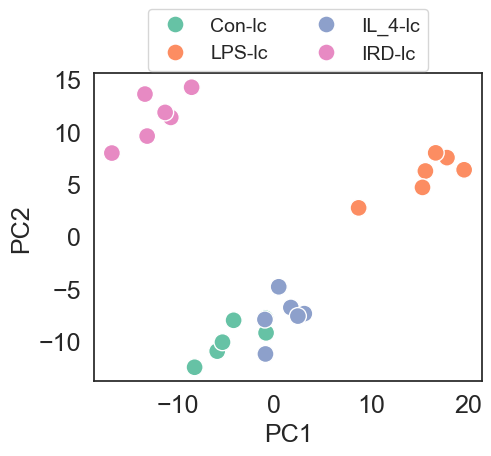

In [81]:
pca = PCA(n_components=2)  # 选择前两个主成分
pca_result = pca.fit_transform(standardscaler(lc_re_filter8.T))

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['sample'] = standardscaler(lc_re_filter8.T).T.columns  # 添加样本名称

plt.figure(figsize=(5, 4))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue='sample', palette='Set2', s=150)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.24), ncol=2, fontsize = 14)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('PC1', fontsize=18)
plt.ylabel('PC2', fontsize=18)
plt.savefig(f'{figure_save_path}/scatter_plot_PCA_lc_shared_proteins.svg',bbox_inches='tight')
plt.show()

In [44]:
# print(plt.colormaps())

#  plot jointplot to show the quantities similarity 

In [85]:
from scipy.stats import pearsonr,spearmanr

def plot_jointplot(rownum = 0, df1 = smad_fi2, df2 = lc_fi): 
    x_value = df1.iloc[:,rownum]
    y_value = df2.iloc[:,rownum]
    corre1, p_value1 = pearsonr(x_value, y_value)
    corre2, p_value2 = spearmanr(x_value, y_value)
    g0 = sns.jointplot( x = x_value, y = y_value,
                    # xlim = (13,26), ylim = (13,26),
                        kind="reg", 
                    # truncate=False,
                        color="purple", height=6)
    g0.fig.set_size_inches(5.3, 5) 
    g0.ax_joint.tick_params(labelsize=22)
    g0.set_axis_labels("SMAD, log2(intensity)", "LC, log2(intensity)", fontsize=24)
    print(f"Spearman correlation: {corre2}, p-value: {p_value2}",
          f"Pearman correlation: {corre1}, p-value: {p_value1}")
    plt.savefig(f'{figure_save_path}/jointplot_LC_SMAD{rownum}.svg',bbox_inches='tight')
    plt.show()

In [86]:
# plot_jointplot(rownum = 12, df1 = lc_re_filter6, df2 = smad_re_filter6)

In [88]:
smad_re_filter_mean_raw

,T1,T2,T3,T4
1433E_MOUSE,18.101736,17.007056,17.841688,17.408245
1433F_MOUSE,18.145401,17.048681,17.740175,17.475735
1433G_MOUSE,17.940646,17.166609,17.733955,17.517516
1433T_MOUSE,18.027055,17.119534,17.762930,17.456480
1433Z_MOUSE,18.028672,17.176555,17.691426,17.469346
...,...,...,...,...
VDAC1_MOUSE,15.368138,15.423361,15.735938,15.727505
VIME_MOUSE,20.770126,20.612167,20.816383,20.849547
VMA5A_MOUSE,16.233480,15.458631,16.204123,15.754549
VPS35_MOUSE,17.181103,16.803980,17.038839,16.832421


Spearman correlation: 0.7300675947938914, p-value: 2.777242228203571e-70 Pearman correlation: 0.6403172455364181, p-value: 2.9229111364521753e-49


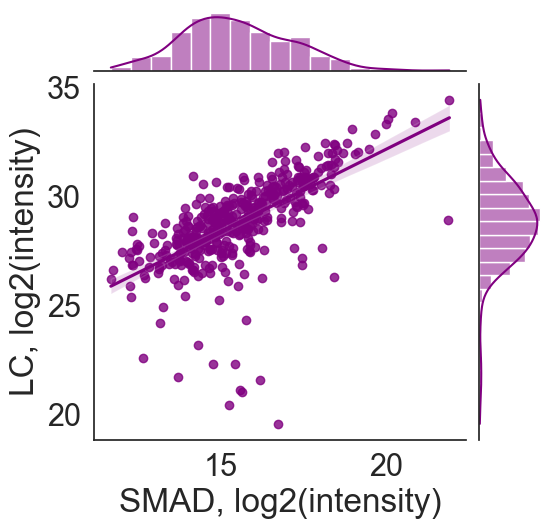

In [74]:
plot_jointplot(rownum = 3, df1 = smad_re_filter_mean_raw, df2 =lc_re_filter_mean_raw)

In [66]:
# plot_jointplot(rownum = 0, df1= pep_smad_fi , df2 = pep_lc_fi)

# plot scatter-jitter-violin plot for the person R values of all proteins 

In [38]:
from scipy.stats import pearsonr
list_pvalue = []
list_pcorr  = []
list_spcorr = []
pep_list_pcorr = []
for protein in shared_proteins:
    value_lc    = lc_fi2.loc[protein]
    value_smad = smad_fi2.loc[protein]
    correlation, p_value = pearsonr(value_lc, value_smad)
    correlation_sp, p_value2 = spearmanr(value_lc, value_smad)
    
    list_pcorr.append(correlation)
    list_spcorr.append(correlation_sp)

# for peptide in shared_peptides:
#     value_lc_pep    = pep_lc_filter_mean.loc[peptide]
#     value_smad_pep = pep_smad_filter_mean.loc[peptide]
#     correlation_pep, p_value_pep = pearsonr(value_lc_pep, value_smad_pep)
#     pep_list_pcorr.append(correlation_pep)      

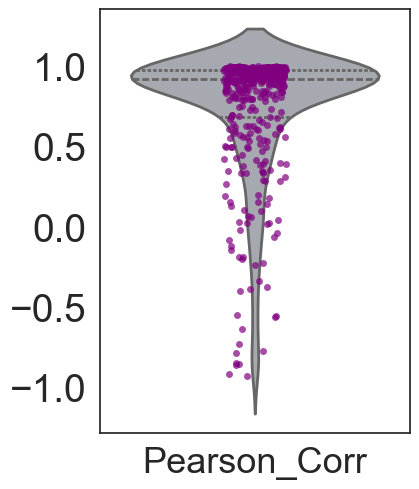

In [56]:

plt.rcParams['font.family'] = 'Arial'
# Create the plot
plt.figure(figsize=(4, 5.5))

# data = pd.DataFrame({'value': list_pcorr + list_spcorr,
#                     'sample': ['Pearson_Corr'] * len(list_pcorr) + ['Spearman_Corr'] * len(list_spcorr)})


# sns.violinplot(x='sample', y='value', data=data, inner="quart", color="#A4A9B0", linewidth=2)  # 'inner=None' removes the internal lines
# sns.stripplot(x='sample', y='value', data=data, jitter=True, color="purple", size=5, alpha=0.7)

sns.violinplot(x=["Pearson_Corr"] * len(list_pcorr), y=list_pcorr, inner="quart", color="#A4A9B0", linewidth=2)
sns.stripplot(x=["Pearson_Corr"] * len(list_pcorr), y=list_pcorr, color="purple", jitter=True, alpha=0.7)
plt.xticks(fontsize=26)
plt.yticks(fontsize=28)
# plt.savefig(f'{figure_save_path}/scatter_violinplot_LC_smad_pearson_R.svg',bbox_inches='tight')
plt.show()

In [549]:
# plot peptide correlation
# plt.rcParams['font.family'] = 'Arial'
# # Create the plot
# plt.figure(figsize=(5, 7))

# # Violin plot
# sns.violinplot(x=["Pearson_Corr"] * len(pep_list_pcorr), y=list_pcorr, inner="quart", color="gray", linewidth=2.5)
# sns.stripplot(x=["Pearson_Corr"] * len(list_pcorr), y=list_pcorr, color="purple", jitter=True, alpha=0.8)

# plt.xticks(fontsize=26)
# plt.yticks(fontsize=28)

# typical proteins scatter-box plot

In [39]:
raw_list_pcorr = []
sud_smad = smad_re_filter8.sort_index()
sud_lc    = lc_re_filter8.sort_index()
for num in range(len(smad_re_filter8.sort_index())):
    value_lc2    = sud_lc.iloc[num,:]
    value_smad2 = sud_smad.iloc[num,:]
    correlation4, p_value4 = pearsonr(value_lc2, value_smad2)  
    raw_list_pcorr.append([num,correlation4])

In [40]:
# [item for item in raw_list_pcorr if item[1] > 0.85]

In [103]:
def plot_box_lineplot_selected_proteins(num = 18):
    '''plot any selected proteins from LC and smad to show their dysregulation pattern'''
    # Two example lists with 24 values each
    list1 = sud_lc.iloc[num,:].tolist()
    list2 = sud_smad.iloc[num,:].tolist()
    conditions = ['Con']*6 + ['LPS']*6 + ['IL_4']*6 + ['IRD']*6
    
    # Create a DataFrame
    dfdf = pd.DataFrame({
        'Condition': conditions * 2,  # Conditions repeated for both lists
        'Z-score': list1 + list2,       # Combine list1 and list2
        'List': ['LC'] * 24 + ['SMAD'] * 24 })
    
    plt.figure(figsize=(5, 4))
    sns.boxplot(x='Condition', y='Z-score', hue='List', data=dfdf, width=0.8,showfliers=False)
    
    # Connect the median values for each condition within the same list with dotted lines
    for list_name in dfdf['List'].unique():
        medians = []
        for condition in dfdf['Condition'].unique():
            median_value = dfdf[(dfdf['Condition'] == condition) & (dfdf['List'] == list_name)]['Z-score'].median()
            medians.append(median_value)
        
        plt.plot(dfdf['Condition'].unique(), medians, linestyle='--', marker='.', linewidth = 3) 
    # Add labels and title
    plt.xlabel('')
    plt.ylabel('Z-score',fontsize=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.legend(fontsize = 14)
    save_name = sud_lc.index[num]
    plt.savefig(f'{figure_save_path}/{save_name}_LC_smad_protein.svg', bbox_inches='tight')
    plt.show()

In [41]:
sud_lc.iloc[248,:]

Con-lc     0.074426
Con-lc     0.023659
Con-lc     0.053958
Con-lc     0.070567
Con-lc     0.006303
Con-lc     0.004298
LPS-lc     0.085278
LPS-lc     0.193847
LPS-lc     0.212131
LPS-lc     0.133818
LPS-lc    -0.033432
LPS-lc     0.129727
IL_4-lc    0.096563
IL_4-lc    0.013529
IL_4-lc    0.190040
IL_4-lc    0.031383
IL_4-lc    0.122645
IL_4-lc    0.042829
IRD-lc     0.521203
IRD-lc     0.473120
IRD-lc     0.537951
IRD-lc     0.474014
IRD-lc     0.502576
IRD-lc     0.479897
Name: PLBL2_MOUSE, dtype: float64

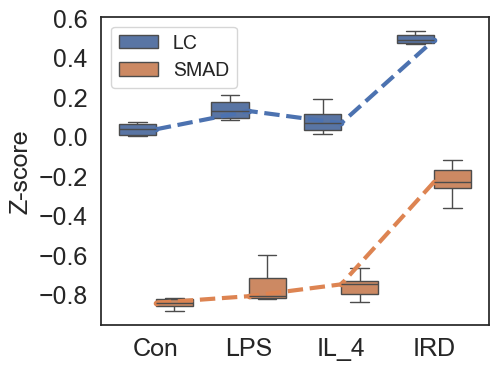

In [104]:
plot_box_lineplot_selected_proteins(num = 248)

In [42]:
sud_lc.iloc[48,:]

Con-lc     0.157166
Con-lc     0.182948
Con-lc     0.259214
Con-lc     0.227799
Con-lc     0.166246
Con-lc     0.188931
LPS-lc     0.207679
LPS-lc     0.325383
LPS-lc     0.316297
LPS-lc     0.260207
LPS-lc     0.253001
LPS-lc     0.266875
IL_4-lc    0.263735
IL_4-lc    0.259601
IL_4-lc    0.262079
IL_4-lc    0.176911
IL_4-lc    0.188033
IL_4-lc    0.165852
IRD-lc     0.779779
IRD-lc     0.798555
IRD-lc     0.766237
IRD-lc     0.682832
IRD-lc     0.775764
IRD-lc     0.754198
Name: BGAL_MOUSE, dtype: float64

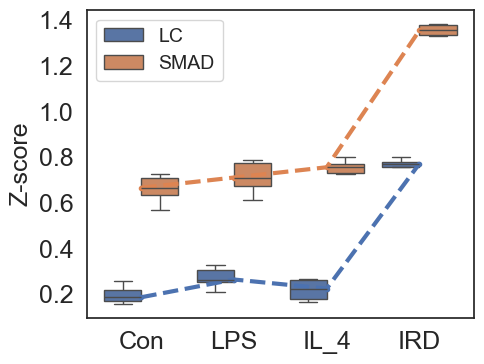

In [105]:
plot_box_lineplot_selected_proteins(num = 48)

In [44]:
sud_lc.iloc[187,:]

Con-lc    -0.999448
Con-lc    -1.004742
Con-lc    -1.075966
Con-lc    -1.063195
Con-lc    -1.016926
Con-lc    -0.911816
LPS-lc     0.489683
LPS-lc     0.420895
LPS-lc     0.431624
LPS-lc     0.572720
LPS-lc     0.199344
LPS-lc     0.343017
IL_4-lc   -1.107973
IL_4-lc   -0.895708
IL_4-lc   -1.003509
IL_4-lc   -0.892177
IL_4-lc   -1.003983
IL_4-lc   -1.065077
IRD-lc    -0.687096
IRD-lc    -0.711723
IRD-lc    -0.604229
IRD-lc    -0.547144
IRD-lc    -0.691423
IRD-lc    -0.680544
Name: ISG15_MOUSE, dtype: float64

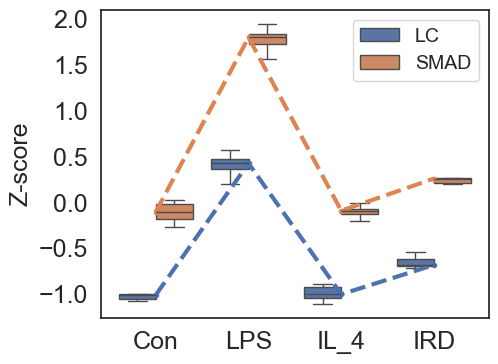

In [106]:
plot_box_lineplot_selected_proteins(num = 187)

# dysregulation pattern analysis